# Importing Libraries & Data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



import warnings
warnings.filterwarnings('ignore')

In [58]:
data = pd.read_csv('https://general-assembly-project-5.s3.amazonaws.com/sp_master.csv')

In [59]:
data.head()

,cd_geocodi,nm_subdist,nm_distrit,nm_municip,nm_micro,nm_meso,id1,geog_orig_area,favela_present,favela_area_squaremeters,...,brazil_store_near_angle,brazil_store_near_price,sp_brazil_store_kernel_density,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,sp_brazil_ph_kernel_density,population_estimate
0,350570810000023,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4151,2.257383e+05,0.0,0.0,...,-0.026392,1200.0,0.003540,0.0,31,8889.189773,-158.493799,2500.0,0.0,1164.570831
1,350570810000025,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4153,3.926667e+04,0.0,0.0,...,-2.042826,1200.0,0.000000,0.0,31,8546.979457,-156.899284,2500.0,0.0,413.065460
2,350570805000043,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4380,3.925101e+04,0.0,0.0,...,177.898449,550.0,0.000000,0.0,31,17668.657905,-146.372789,2500.0,0.0,424.170563
3,350570805000056,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4393,7.136625e+04,0.0,0.0,...,-86.225561,7560.0,0.532356,0.0,31,14395.394220,-159.666627,2500.0,0.0,272.054306
4,350570805000057,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4394,1.264789e+06,0.0,0.0,...,0.000000,7560.0,0.505313,0.0,31,13056.248015,-160.753356,2500.0,0.0,2401.068539


In [60]:
data.describe()

,cd_geocodi,id1,geog_orig_area,favela_present,favela_area_squaremeters,sao_paulo_apartment_count_listings,sao_paulo_apartment_near_fid,sao_paulo_apartment_near_dist,sao_paulo_apartment_near_angle,sao_paulo_apartment_near_price,...,brazil_store_near_angle,brazil_store_near_price,sp_brazil_store_kernel_density,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,sp_brazil_ph_kernel_density,population_estimate
count,2.781700e+04,27817.000000,2.781700e+04,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,2.781700e+04,...,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000,27817.000000
mean,3.545147e+14,45631.993637,1.086461e+05,0.221411,852.603057,0.480749,6383.476939,1381.466201,0.966970,1.669580e+05,...,4.824355,8269.046986,0.502690,0.003775,64.715102,5580.939094,-1.423161,3395.134270,0.012708,697.857937
std,1.143566e+12,14182.287715,6.679838e+05,0.415204,3375.446206,2.125265,4288.662831,2225.903861,91.443765,2.991915e+05,...,99.729253,19840.795138,2.176391,0.140948,42.603400,4132.284706,102.503573,3615.253919,0.085228,814.251001
min,3.505708e+14,4151.000000,7.204612e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-179.999999,4.800000e+02,...,-179.999967,243.000000,0.000000,0.000000,0.000000,0.000000,-179.999978,600.000000,0.000000,0.022254
25%,3.548708e+14,40223.000000,1.966987e+04,0.000000,0.000000,0.000000,2122.000000,44.663556,-60.623415,1.500000e+03,...,-77.494726,1300.000000,0.000000,0.000000,31.000000,2309.688526,-94.930909,1200.000000,0.000000,271.887459
50%,3.550308e+14,49162.000000,3.735301e+04,0.000000,0.000000,0.000000,6597.000000,317.392635,0.000000,8.000000e+04,...,1.821864,2800.000000,0.000000,0.000000,69.000000,4725.310805,-4.645367,2200.000000,0.000000,541.281494
75%,3.550309e+14,55899.000000,6.344960e+04,0.000000,0.000000,0.000000,9867.000000,1580.365671,70.885312,2.350000e+05,...,90.968477,7500.000000,0.000000,0.000000,85.000000,8079.799727,100.043084,3500.000000,0.000000,857.065901
max,3.552809e+14,65450.000000,6.401871e+07,1.000000,142763.606501,72.000000,13639.000000,18814.572237,179.999998,7.500000e+06,...,179.999926,250000.000000,22.422045,16.000000,152.000000,22174.147819,179.950102,15000.000000,1.305079,26176.639700


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27817 entries, 0 to 27816
Data columns (total 41 columns):
cd_geocodi                               27817 non-null int64
nm_subdist                               27817 non-null object
nm_distrit                               27817 non-null object
nm_municip                               27817 non-null object
nm_micro                                 27817 non-null object
nm_meso                                  27817 non-null object
id1                                      27817 non-null int64
geog_orig_area                           27817 non-null float64
favela_present                           27817 non-null float64
favela_area_squaremeters                 27817 non-null float64
sao_paulo_apartment_count_listings       27817 non-null float64
sao_paulo_apartment_near_fid             27817 non-null int64
sao_paulo_apartment_near_dist            27817 non-null float64
sao_paulo_apartment_near_angle           27817 non-null float64
sao_pa

In [62]:
data.shape

(27817, 41)

In [118]:
X_cols = ['sao_paulo_apartment_count_listings', 'sao_paulo_apartment_near_dist', 'sao_paulo_apartment_near_angle',
         'sao_paulo_apartment_near_price', 'brazil_apartment_count_listings', 'brazil_apartment_near_dist', 
         'brazil_apartment_near_angle', 'brazil_apartment_near_price', 'brazil_house_count_listings', 
         'brazil_house_near_dist', 'brazil_house_near_angle', 'brazil_house_near_price', 
         'brazil_store_count_listings', 'brazil_store_near_dist', 'brazil_store_near_angle',
         'brazil_store_near_price', 'brazil_ph_count_listings', 'brazil_ph_near_dist', 'brazil_ph_near_angle',
         'brazil_ph_near_price', 'population_estimate',
         ]

X = data[X_cols]
y = data['favela_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

Picking out the numeric columns that might help with determining the presence of a informal settlements from the real estate and population data we were able to find.

# Modeling

## Base Model

In [119]:
data['favela_present'].value_counts(normalize = True)

0.0    0.778589
1.0    0.221411
Name: favela_present, dtype: float64

A base model that predicts no favelas present in each census grid would be about 77.8% accurate. Any models we make should hope to perform better than that.

## Logistic Regression Model

Starting off with a scaler and logistic regression model.

In [65]:
pipe = Pipeline(steps = [
    ('sc', StandardScaler()),
    ('lr', LogisticRegression())
])

params = {
    'lr__penalty'        : ['l1', 'l2'],
    'lr__C'              : [0.1, 0.3, 0.5, 0.7, 1.0],
    
}

gs_lr = GridSearchCV(pipe,
                 param_grid = params,
                 cv = 5,
                 scoring = 'accuracy')

gs_lr.fit(X_train, y_train);

In [66]:
gs_lr.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [67]:
gs_lr.best_score_

0.7833379858971028

In [68]:
gs_lr.score(X_test, y_test)

0.7870596693026599

This model performs about as well as the base model, but could definitely perform a lot better. Moving on to a K-Nearest Neighbors model to see how well it performs.

In [69]:
roc_auc_score(y_test, gs_lr.predict_proba(X_test)[:, 1])

0.7762345897278358

## KNN Model

In [70]:
pipe = Pipeline(steps = [
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors'    : [3, 5, 7, 9],
    'knn__metric'         : ['minkowski', 'euclidean', 'manhattan']
    
}

gs_knn = GridSearchCV(pipe,
                 param_grid = params,
                 cv = 5,
                 scoring = 'accuracy')

gs_knn.fit(X_train, y_train);

In [71]:
gs_knn.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [72]:
gs_knn.best_score_

0.8480971358817435

In [73]:
gs_knn.score(X_test, y_test)

0.8569374550682962

This model is already better than the base model. There is still some room for improvement, however. Next step is to try a Decision Tree model.

In [74]:
roc_auc_score(y_test, gs_knn.predict_proba(X_test)[:, 1])

0.8859177195086548

## Decision Tree Model

In [75]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
tree.score(X_train, y_train)

1.0

In [77]:
tree.score(X_test, y_test)

0.8339324227174695

In [78]:
cross_val_score(tree, X_train, y_train, cv = 5).mean()

0.8320388867023754

The Desicion Tree doesn't perform as well as K-Nearest Neighbors at the moment. Let's move onto Random Forests, to see how that works.

In [79]:
roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

0.7756515841952762

## Bagging Classifier Model

In [80]:
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [81]:
bagging.score(X_train, y_train)

0.9911322020899243

In [82]:
cross_val_score(bagging, X_train, y_train, cv = 5).mean()

0.8723995097920957

In [83]:
bagging.score(X_test, y_test)

0.8802300503235083

In [84]:
roc_auc_score(y_test, bagging.predict_proba(X_test)[:, 1])

0.9106044199586382

## Random Forest Model

In [85]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
rand_forest.score(X_train, y_train)

1.0

In [87]:
cross_val_score(rand_forest, X_train, y_train, cv = 5).mean()

0.8865881405804883

In [88]:
rand_forest.score(X_test, y_test)

0.892882818116463

This model works better than the KNN model, but there is still a lot of room for improvement. Let's increase the randomness of the model and try to reduce the variance with an Extra Trees model.

In [89]:
roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])

0.9419779445555025

## Extra Trees Model

In [120]:
extra_trees = ExtraTreesClassifier(n_estimators = 200)
extra_trees.fit(X_train, y_train)
extra_trees.score(X_train, y_train)

1.0

In [121]:
cross_val_score(extra_trees, X_train, y_train, cv = 5).mean()

0.8892244095781698

In [122]:
extra_trees.score(X_test, y_test)

0.893314162473041

That's an even better model, but we can still improve a lot. Let's try another boosting model like AdaBoost to see how well it performs.

In [123]:
roc_auc_score(y_test, extra_trees.predict_proba(X_test)[:, 1])

0.9452377533479068

## AdaBoost Model

In [94]:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(X_train, y_train)
ada.score(X_train, y_train)

0.8329019269485188

In [95]:
cross_val_score(ada, X_train, y_train, cv = 5).mean()

0.8206787734417414

In [96]:
ada.score(X_test, y_test)

0.8202731847591661

This model is worse than most of the previous models, the Extra Trees model is still the best option for the moment. Let's try moving on to a Voting Classifier to see how well it performs.

In [97]:
roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

0.8570944246020664

## Gradient Boost Model

In [98]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
grad_boost.score(X_train, y_train)

0.843351548269581

In [99]:
cross_val_score(grad_boost, X_train, y_train, cv = 5).mean()

0.834004451297307

In [100]:
grad_boost.score(X_test, y_test)

0.8317757009345794

In [101]:
roc_auc_score(y_test, grad_boost.predict_proba(X_test)[:, 1])

0.8737016320559071

This model is slightly better than the AdaBoost model, but still not as good as the Extra Trees model. Let's try a Voting Classifier with the best performing models next.

## Voting Classifier Model

In [102]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])



vote = VotingClassifier([
    ('x_tree', ExtraTreesClassifier()),
    ('rand_forest', RandomForestClassifier()),
    ('knn_pipe', knn_pipe),
], voting = 'soft')
vote_params = {
    'x_tree__max_depth': [None, 4],
    'rand_forest__max_depth': [3, 4],
    'knn_pipe__knn__n_neighbors': [3, 5, 7],

}
gs_vc = GridSearchCV(vote, 
                     param_grid = vote_params, 
                     cv = 5,
                     n_jobs = -2,
                     scoring = 'accuracy')
gs_vc.fit(X_train, y_train)
print(gs_vc.best_score_) # cross val score
gs_vc.best_params_

0.8733102290462889


{'knn_pipe__knn__n_neighbors': 3,
 'rand_forest__max_depth': 4,
 'x_tree__max_depth': None}

In [103]:
gs_vc.score(X_test, y_test)

0.8779295470884256

In [104]:
roc_auc_score(y_test, gs_vc.predict_proba(X_test)[:, 1])

0.9213519064065164

In [105]:
feats = extra_trees.feature_importances_

In [106]:
keys = X_test.keys()

In [107]:
feat_import = pd.DataFrame(list(zip(keys, feats)), columns = ['feature', 'importance'])

In [108]:
feat_import = feat_import.sort_values(by = 'importance', ascending = False)

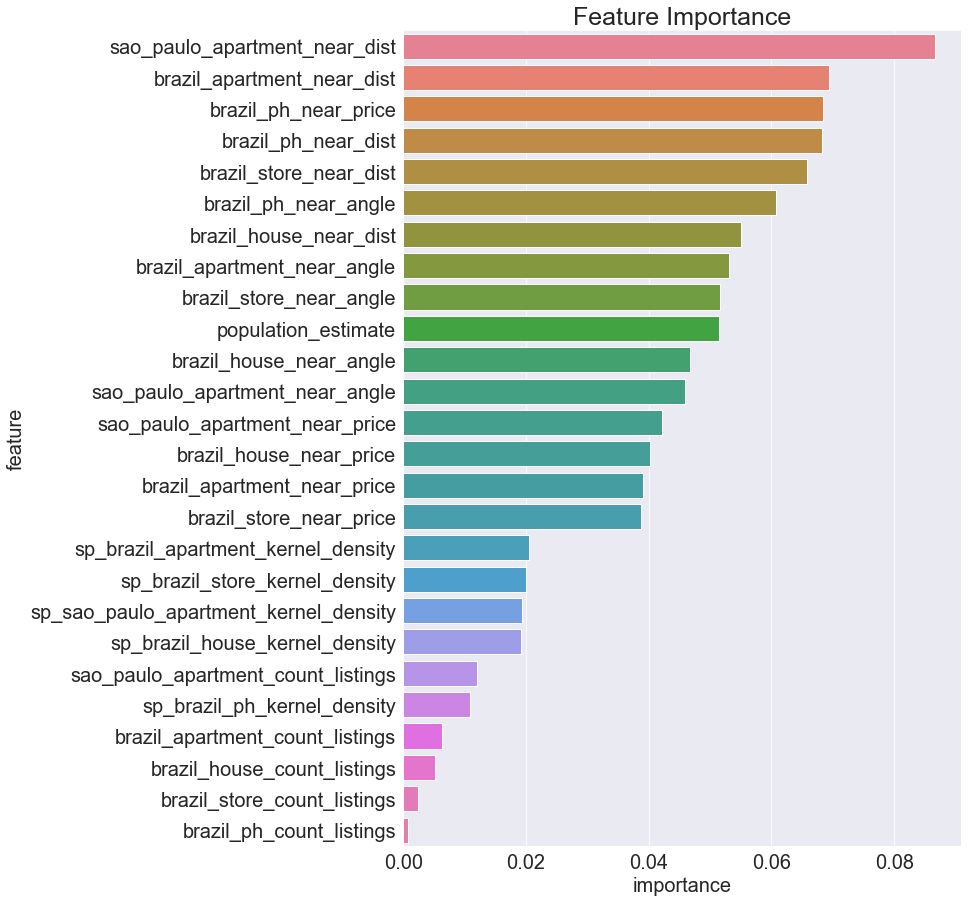

In [109]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance',fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data= feat_import,
            x='importance',y='feature',orient='h', palette="husl")
plt.xlabel('importance',fontsize=20)
plt.ylabel('feature',fontsize=20)
plt.tick_params(labelsize=20)

In [110]:
# Creating a DataFrame to facilitate plotting.
pred_proba = [i[1] for i in extra_trees.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.942


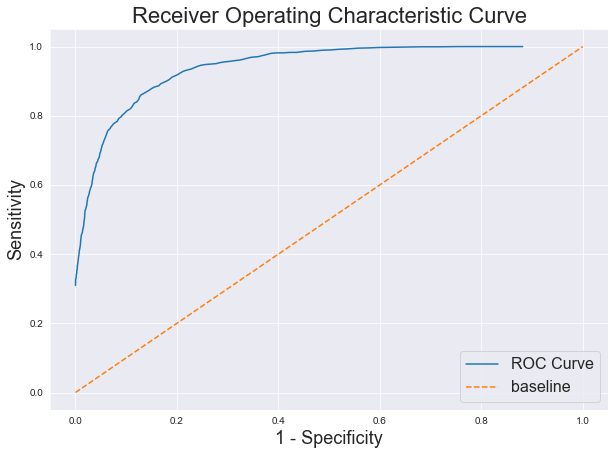

In [111]:
# Creating ROC Scores for baseline and best model.
ns_probs = [0 for _ in range(len(y_test))]
pipe_probs = extra_trees.predict_proba(X_test)
pipe_probs = pipe_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
pipe_auc = roc_auc_score(y_test, pipe_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (pipe_auc))
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);
